# KNN Classifer - Simple Train and Test

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors, metrics

%matplotlib inline

## Data Prep

In [2]:
# loading iris data
iris = datasets.load_iris()

# forming a dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# create a target column
iris_df['species'] = iris.target

# view the dataset
iris_df.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0

## EDA

In [3]:
# describe the dataset
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [4]:
# look at the data types
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


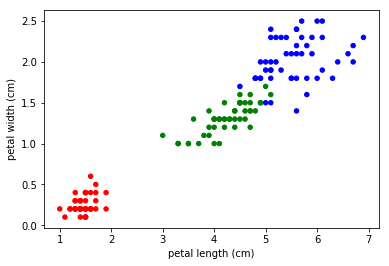

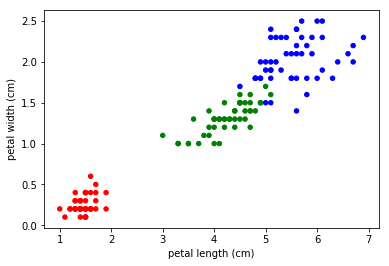

In [5]:
# map some colours in the dataset
cmap = {'0': 'r', '1': 'g', '2': 'b' }

iris_df['cspecies'] = iris_df.species.apply(lambda x: cmap[str(x)])

# viewing the data
iris_df.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=iris_df.cspecies)
iris_df.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=iris_df.cspecies)

## Training

In [6]:
# specifying the classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

from sklearn.model_selection import train_test_split

# feature set
X = iris_df.drop(columns = ['species', 'cspecies'])

# target
y = iris_df['species']

# creating training / testings datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(len(X_train.index))
print(len(X_test.index))

100
50


In [8]:
# fit the classifier
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Testing

In [9]:
# predicted
predicted = knn.predict(X_test)

# actual
validate = pd.DataFrame(y_test)

validate.columns = ['actual']

validate['predicted'] = predicted

validate.head(10)

actual  predicted
73        1          1
18        0          0
118       2          2
78        1          1
76        1          1
31        0          0
64        1          1
141       2          2
68        1          1
82        1          1

In [10]:
# overal accuracy... be careful!!
np.sum(validate['actual'] == validate['predicted']) / len(validate)

0.98

## Confustion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(validate['actual'], validate['predicted'])

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [12]:
pd.crosstab(validate['actual'], validate['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted   0   1   2  All
Actual                    
0          19   0   0   19
1           0  15   0   15
2           0   1  15   16
All        19  16  15   50